# **SCH-MGMT 661: Final AI Project - Predicting Laptop Ratings**

In [35]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

## Pre-processing Data

In [36]:
# Import data from Google Drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/AI_Laptop_Project/laptopPrice.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,brand,processor_brand,processor_name,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,warranty_years,Touchscreen,msoffice,Price_USD,rating_stars,Number of Ratings,Number of Reviews
0,Asus,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,415.79,2,3,0
1,Lenovo,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,467.99,3,65,5
2,Lenovo,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,479.99,3,8,1
3,Asus,Intel,Core i5,8,DDR4,512,0,Windows,32,2,Casual,0,No,No,839.88,3,0,0
4,Asus,Intel,Celeron Dual,4,DDR4,0,512,Windows,64,0,Casual,0,No,No,323.88,3,0,0


In [37]:
# Print the shape of the data
print("Shape of the data:", df.shape)

# Check missing data
df.isnull().sum()
print("Number of Null Cases:")
print(df.isnull().sum())

# Determine the count of each of the Rating_Star (target variable) categories (1-5)
print("Number of Cases per Class:")
print(df['rating_stars'].value_counts())

# Determine the data types for all of the variables in the laptop data set
print(df.dtypes)

Shape of the data: (823, 18)
Number of Null Cases:
brand                0
processor_brand      0
processor_name       0
ram_gb               0
ram_type             0
ssd_gb               0
hdd_gb               0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty_years       0
Touchscreen          0
msoffice             0
Price_USD            0
rating_stars         0
Number of Ratings    0
Number of Reviews    0
dtype: int64
Number of Cases per Class:
rating_stars
4    444
3    352
5     16
2      9
1      2
Name: count, dtype: int64
brand                 object
processor_brand       object
processor_name        object
ram_gb                 int64
ram_type              object
ssd_gb                 int64
hdd_gb                 int64
os                    object
os_bit                 int64
graphic_card_gb        int64
weight                object
warranty_years         int64
Touchscreen           object
msoffice              object
Price

In [38]:
# Define features and target variable
X = df.drop(['rating_stars'], axis=1)
y = df['rating_stars']

# Show the shape of x and y
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (823, 17)
y shape: (823,)


In [39]:
# Encode categorical variables
X = pd.get_dummies(data=X, columns=['brand','processor_brand', 'processor_name',
                                    'ram_type', 'os','weight','Touchscreen',
                                    'msoffice', 'ssd_gb','hdd_gb'], dtype=int)

# Print the dataset for the feature variables
X.head()

,ram_gb,os_bit,graphic_card_gb,warranty_years,Price_USD,Number of Ratings,Number of Reviews,brand_Acer,brand_Apple,brand_Asus,...,ssd_gb_128,ssd_gb_256,ssd_gb_512,ssd_gb_1024,ssd_gb_2048,ssd_gb_3072,hdd_gb_0,hdd_gb_512,hdd_gb_1024,hdd_gb_2048
0,4,64,0,0,415.79,3,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4,64,0,0,467.99,65,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,64,0,0,479.99,8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8,32,2,0,839.88,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,4,64,0,0,323.88,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the Model

In [41]:
# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=30, gamma='scale')
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_pred_train = svm_classifier.predict(X_train_scaled)
y_pred_test = svm_classifier.predict(X_test_scaled)

## Evaluate Model Performance on Training Set

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.86      0.92         7
           3       0.90      0.96      0.93       281
           4       0.96      0.93      0.95       355
           5       1.00      0.69      0.82        13

    accuracy                           0.94       658
   macro avg       0.97      0.89      0.92       658
weighted avg       0.94      0.94      0.94       658

Accuracy Report:
0.9361702127659575
Confusion Matrix:


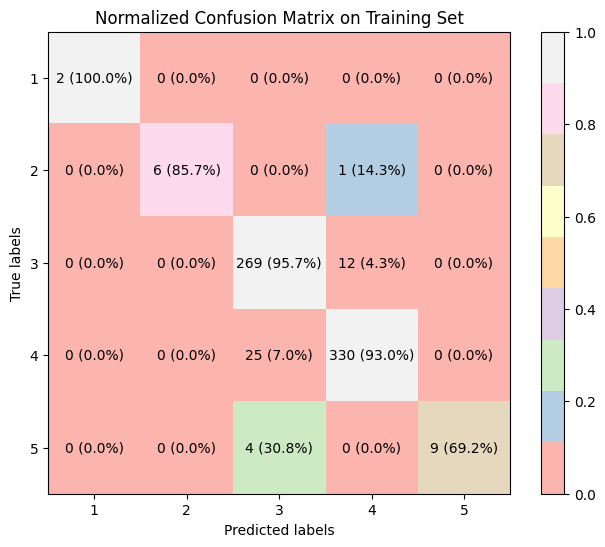

{'Accuracy': [0.9361702127659575], 'Precision': [0.9379932400007303], 'Recall': [0.9361702127659575], 'F1 Score': [0.9359774382381773]}


In [42]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Accuracy Report:")
print(accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with values and percentages
plt.figure(figsize=(8, 6))

# Set tick labels to match the actual class labels (1 to 5)
plt.xticks(np.arange(5), np.arange(1, 6))  # Set x-axis ticks from 1 to 5
plt.yticks(np.arange(5), np.arange(1, 6))  # Set y-axis ticks from 1 to 5

for i in range(conf_matrix_norm.shape[0]):
    for j in range(conf_matrix_norm.shape[1]):
        plt.text(j, i, f"{conf_matrix[i, j]} ({conf_matrix_norm[i, j]*100:.1f}%)",
                 ha="center", va="center", color="black")
plt.imshow(conf_matrix_norm, cmap='Pastel1', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Normalized Confusion Matrix on Training Set")
plt.show()

# Key assessment results table
accuracy = np.mean(y_pred_train == y_train)
precision = np.mean(classification_report(y_train, y_pred_train, output_dict=True)['weighted avg']['precision'])
recall = np.mean(classification_report(y_train, y_pred_train, output_dict=True)['weighted avg']['recall'])
f1 = np.mean(classification_report(y_train, y_pred_train, output_dict=True)['weighted avg']['f1-score'])

key_results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
}

print(key_results)

## Evaluate Model Performance on Test Set

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.68      0.68      0.68        71
           4       0.74      0.73      0.73        89
           5       0.00      0.00      0.00         3

    accuracy                           0.68       165
   macro avg       0.28      0.28      0.28       165
weighted avg       0.69      0.68      0.69       165

Accuracy Report:
0.6848484848484848
Confusion Matrix:


<ipython-input-43-62e638512366>:10: RuntimeWarning: invalid value encountered in divide
  conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


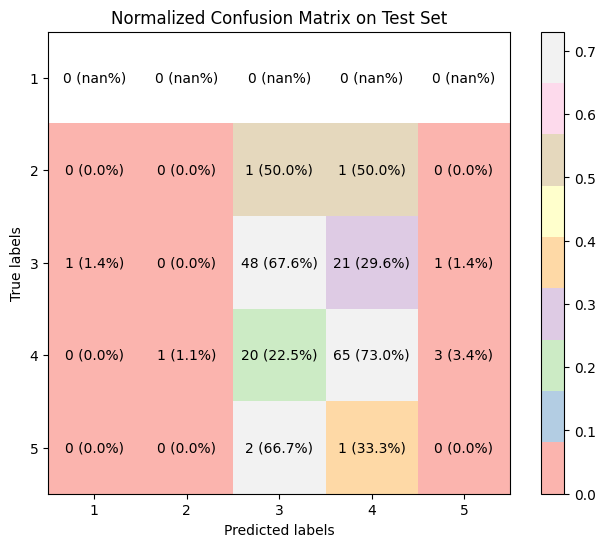

{'Accuracy': [0.6848484848484848], 'Precision': [0.6893250688705234], 'Recall': [0.6848484848484848], 'F1 Score': [0.6870741311419278]}


In [43]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Accuracy Report:")
print(accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with values and percentages
plt.figure(figsize=(8, 6))

plt.xticks(np.arange(5), np.arange(1, 6))  # Set x-axis ticks from 1 to 5
plt.yticks(np.arange(5), np.arange(1, 6))  # Set y-axis ticks from 1 to 5

for i in range(conf_matrix_norm.shape[0]):
    for j in range(conf_matrix_norm.shape[1]):
        plt.text(j, i, f"{conf_matrix[i, j]} ({conf_matrix_norm[i, j]*100:.1f}%)",
                 ha="center", va="center", color="black")
plt.imshow(conf_matrix_norm, cmap='Pastel1', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Normalized Confusion Matrix on Test Set")
plt.show()

# Key assessment results table
accuracy = np.mean(y_pred_test == y_test)
precision = np.mean(classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)['weighted avg']['precision'])
recall = np.mean(classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)['weighted avg']['recall'])
f1 = np.mean(classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)['weighted avg']['f1-score'])

key_results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
}

print(key_results)

## Check for Overfitting

In [44]:
# Calculate accuracies
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print("Accuracy on Training Data:", accuracy_train)
print("Accuracy on Test Data:", accuracy_test)

# Check for overfitting or underfitting
if accuracy_train > accuracy_test:
    print("The model might be overfitting.")
elif accuracy_train < accuracy_test:
    print("The model might be underfitting.")
else:
    print("The model's performance seems balanced.")

Accuracy on Training Data: 0.9361702127659575
Accuracy on Test Data: 0.6848484848484848
The model might be overfitting.


## Feature Importance Analysis

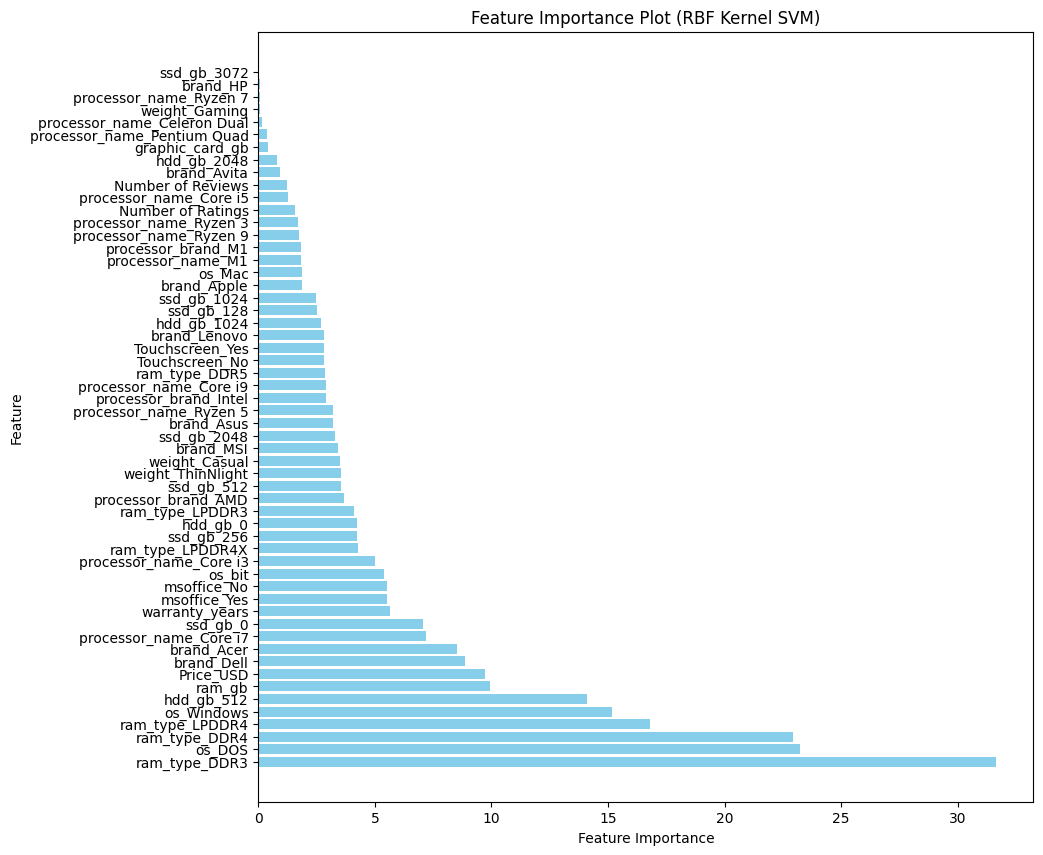

In [45]:
# Get the indices of support vectors
support_vector_indices = svm_classifier.support_

# Get the support vectors
support_vectors = X_train_scaled[support_vector_indices]

# Calculate the dual coefficients (multipliers) for the support vectors
dual_coefficients = svm_classifier.dual_coef_[0]

# Calculate the feature importance by multiplying the support vectors with their corresponding dual coefficients
feature_importance_values = np.abs(np.dot(support_vectors.T, dual_coefficients))

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and importance values
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_values})

# Sort the DataFrame by importance values
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (RBF Kernel SVM)')
plt.show()

## Running the SVM Model Again with Feature Importance

## Pre-processing Data

In [46]:
# Make a copy of the original dataframe
df_copy = df.copy()
df_copy.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,warranty_years,Touchscreen,msoffice,Price_USD,rating_stars,Number of Ratings,Number of Reviews
0,Asus,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,415.79,2,3,0
1,Lenovo,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,467.99,3,65,5
2,Lenovo,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,479.99,3,8,1
3,Asus,Intel,Core i5,8,DDR4,512,0,Windows,32,2,Casual,0,No,No,839.88,3,0,0
4,Asus,Intel,Celeron Dual,4,DDR4,0,512,Windows,64,0,Casual,0,No,No,323.88,3,0,0


In [47]:
# Define features and target variable
X = df_copy.drop(['rating_stars'], axis=1)
y = df_copy['rating_stars']

# Show the shape of x and y
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (823, 17)
y shape: (823,)


In [48]:
# Encode categorical variables
X = pd.get_dummies(data=X, columns=['brand','processor_brand', 'processor_name',
                                    'ram_type', 'os','weight','Touchscreen',
                                    'msoffice', 'ssd_gb','hdd_gb'], dtype=int)

# Print the dataset for the feature variables
X.head()

,ram_gb,os_bit,graphic_card_gb,warranty_years,Price_USD,Number of Ratings,Number of Reviews,brand_Acer,brand_Apple,brand_Asus,...,ssd_gb_128,ssd_gb_256,ssd_gb_512,ssd_gb_1024,ssd_gb_2048,ssd_gb_3072,hdd_gb_0,hdd_gb_512,hdd_gb_1024,hdd_gb_2048
0,4,64,0,0,415.79,3,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4,64,0,0,467.99,65,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,64,0,0,479.99,8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8,32,2,0,839.88,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,4,64,0,0,323.88,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Re-define feature variables
X = X[['ram_type_DDR3', 'os_DOS', 'ram_type_LPDDR4', 'hdd_gb_512', 'ram_gb',
             'ram_type_DDR4', 'os_Windows', 'brand_Dell', 'Price_USD',
             'brand_Acer']]
X.columns

Index(['ram_type_DDR3', 'os_DOS', 'ram_type_LPDDR4', 'hdd_gb_512', 'ram_gb',
       'ram_type_DDR4', 'os_Windows', 'brand_Dell', 'Price_USD', 'brand_Acer'],
      dtype='object')

In [50]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

## Train the Model

In [51]:
# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=30, gamma='scale')
svm_classifier.fit(X_train_scaled2, y_train2)

# Make predictions on the training and testing sets
y_pred_train2 = svm_classifier.predict(X_train_scaled2)
y_pred_test2 = svm_classifier.predict(X_test_scaled2)

## Evaluate the Model Performance on Training Set

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         7
           3       0.64      0.43      0.52       281
           4       0.63      0.83      0.71       355
           5       1.00      0.15      0.27        13

    accuracy                           0.64       658
   macro avg       0.65      0.48      0.50       658
weighted avg       0.64      0.64      0.61       658

Accuracy Report:
0.6352583586626139
Confusion Matrix:


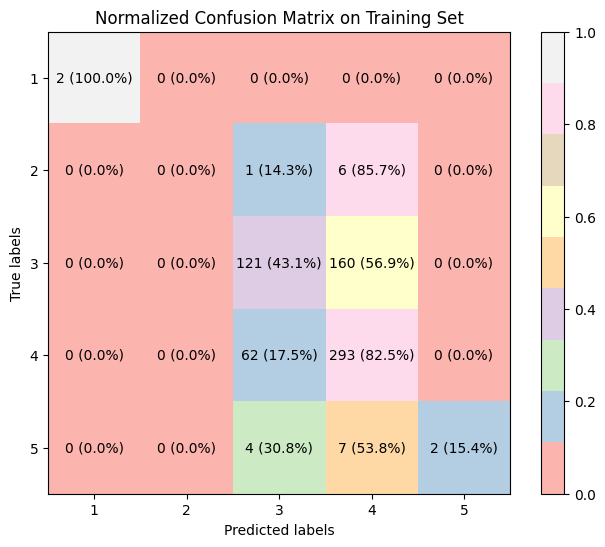

{'Accuracy': [0.6352583586626139], 'Precision': [0.6368761967859592], 'Recall': [0.6352583586626139], 'F1 Score': [0.6137483048217316]}


In [52]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_train2, y_pred_train2, zero_division=0))
print("Accuracy Report:")
print(accuracy_score(y_train2, y_pred_train2))
print("Confusion Matrix:")
conf_matrix2 = confusion_matrix(y_train2, y_pred_train2)

# Normalize the confusion matrix
conf_matrix_norm2 = conf_matrix2.astype('float') / conf_matrix2.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with values and percentages
plt.figure(figsize=(8, 6))

# Set tick labels to match the actual class labels (1 to 5)
plt.xticks(np.arange(5), np.arange(1, 6))  # Set x-axis ticks from 1 to 5
plt.yticks(np.arange(5), np.arange(1, 6))  # Set y-axis ticks from 1 to 5

for i in range(conf_matrix_norm2.shape[0]):
    for j in range(conf_matrix_norm2.shape[1]):
        plt.text(j, i, f"{conf_matrix2[i, j]} ({conf_matrix_norm2[i, j]*100:.1f}%)",
                 ha="center", va="center", color="black")
plt.imshow(conf_matrix_norm2, cmap='Pastel1', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Normalized Confusion Matrix on Training Set")
plt.show()

# Key assessment results table
accuracy2 = np.mean(y_pred_train2 == y_train2)
precision2 = np.mean(classification_report(y_train2, y_pred_train2, output_dict=True, zero_division=0)['weighted avg']['precision'])
recall2 = np.mean(classification_report(y_train2, y_pred_train2, output_dict=True, zero_division=0)['weighted avg']['recall'])
f1_2 = np.mean(classification_report(y_train2, y_pred_train2, output_dict=True, zero_division=0)['weighted avg']['f1-score'])

key_results2 = {
    'Accuracy': [accuracy2],
    'Precision': [precision2],
    'Recall': [recall2],
    'F1 Score': [f1_2]
}

print(key_results2)

## Evaluate the Model Performance on Test Set

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.67      0.48      0.56        71
           4       0.66      0.84      0.74        89
           5       0.00      0.00      0.00         3

    accuracy                           0.66       165
   macro avg       0.27      0.26      0.26       165
weighted avg       0.64      0.66      0.64       165

Accuracy Report:
0.6606060606060606
Confusion Matrix:


<ipython-input-53-211914d787e4>:10: RuntimeWarning: invalid value encountered in divide
  conf_matrix_norm2 = conf_matrix2.astype('float') / conf_matrix2.sum(axis=1)[:, np.newaxis]


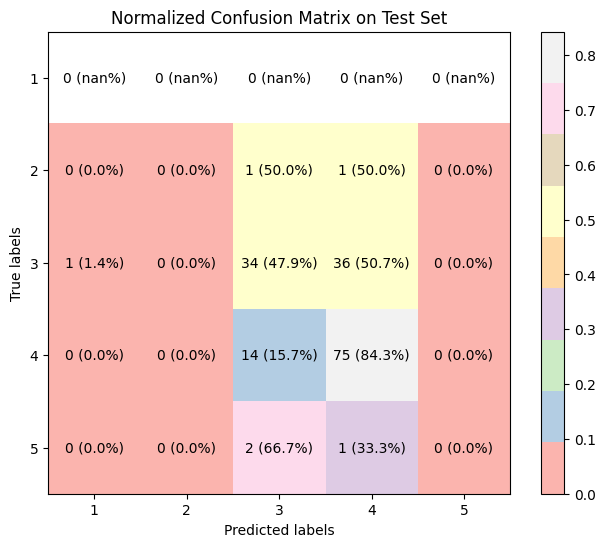

{'Accuracy': [0.6606060606060606], 'Precision': [0.6448735139000625], 'Recall': [0.6606060606060606], 'F1 Score': [0.6403810872890567]}


In [53]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test2, y_pred_test2, zero_division=0))
print("Accuracy Report:")
print(accuracy_score(y_test2, y_pred_test2))
print("Confusion Matrix:")
conf_matrix2 = confusion_matrix(y_test2, y_pred_test2)

# Normalize the confusion matrix
conf_matrix_norm2 = conf_matrix2.astype('float') / conf_matrix2.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with values and percentages
plt.figure(figsize=(8, 6))

plt.xticks(np.arange(5), np.arange(1, 6))  # Set x-axis ticks from 1 to 5
plt.yticks(np.arange(5), np.arange(1, 6))  # Set y-axis ticks from 1 to 5

for i in range(conf_matrix_norm2.shape[0]):
    for j in range(conf_matrix_norm2.shape[1]):
        plt.text(j, i, f"{conf_matrix2[i, j]} ({conf_matrix_norm2[i, j]*100:.1f}%)",
                 ha="center", va="center", color="black")
plt.imshow(conf_matrix_norm2, cmap='Pastel1', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Normalized Confusion Matrix on Test Set")
plt.show()

# Key assessment results table
accuracy2 = np.mean(y_pred_test2 == y_test2)
precision2 = np.mean(classification_report(y_test2, y_pred_test2, output_dict=True, zero_division=0)['weighted avg']['precision'])
recall2 = np.mean(classification_report(y_test2, y_pred_test2, output_dict=True, zero_division=0)['weighted avg']['recall'])
f1_2 = np.mean(classification_report(y_test2, y_pred_test2, output_dict=True, zero_division=0)['weighted avg']['f1-score'])

key_results2 = {
    'Accuracy': [accuracy2],
    'Precision': [precision2],
    'Recall': [recall2],
    'F1 Score': [f1_2]
}

print(key_results2)

## Check for Overfitting

In [54]:
# Calculate accuracies
accuracy_train2 = accuracy_score(y_train2, y_pred_train2)
accuracy_test2 = accuracy_score(y_test2, y_pred_test2)

# Print the accuracies
print("Accuracy on Training Data:", accuracy_train2)
print("Accuracy on Test Data:", accuracy_test2)

# Check for overfitting or underfitting
if accuracy_train2 > accuracy_test2:
    print("The model might be overfitting.")
elif accuracy_train2 < accuracy_test2:
    print("The model might be underfitting.")
else:
    print("The model's performance seems balanced.")

Accuracy on Training Data: 0.6352583586626139
Accuracy on Test Data: 0.6606060606060606
The model might be underfitting.


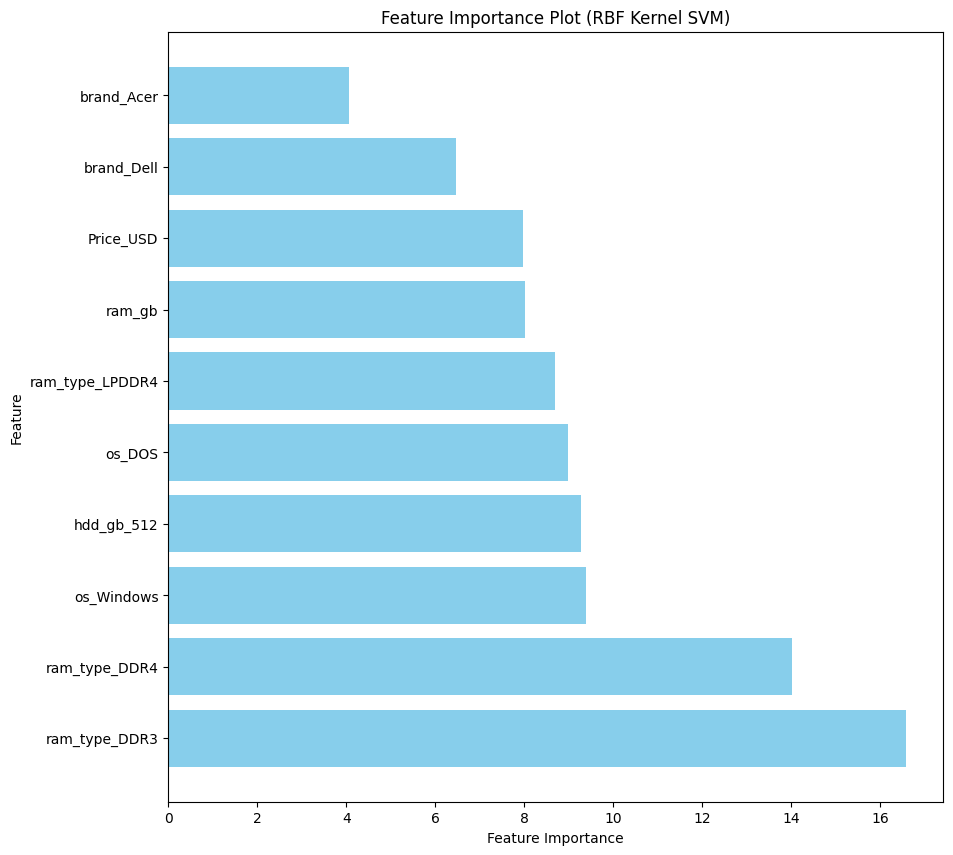

In [55]:
# Get the indices of support vectors
support_vector_indices = svm_classifier.support_

# Get the support vectors
support_vectors = X_train_scaled2[support_vector_indices]

# Calculate the dual coefficients (multipliers) for the support vectors
dual_coefficients = svm_classifier.dual_coef_[0]

# Calculate the feature importance by multiplying the support vectors with their corresponding dual coefficients
feature_importance_values = np.abs(np.dot(support_vectors.T, dual_coefficients))

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and importance values
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_values})

# Sort the DataFrame by importance values
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (RBF Kernel SVM)')
plt.show()

# Running the Model Again Using Random Forest

## Pre-processing Data

In [84]:
# Make a copy of the original dataframe
df_copy3 = df.copy()
df_copy3.head()

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,warranty_years,Touchscreen,msoffice,Price_USD,rating_stars,Number of Ratings,Number of Reviews
0,Asus,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,415.79,2,3,0
1,Lenovo,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,467.99,3,65,5
2,Lenovo,Intel,Core i3,4,DDR4,0,1024,Windows,64,0,Casual,0,No,No,479.99,3,8,1
3,Asus,Intel,Core i5,8,DDR4,512,0,Windows,32,2,Casual,0,No,No,839.88,3,0,0
4,Asus,Intel,Celeron Dual,4,DDR4,0,512,Windows,64,0,Casual,0,No,No,323.88,3,0,0


In [85]:
# Define features and target variable
X = df_copy3.drop(['rating_stars'], axis=1)
y = df_copy3['rating_stars']

# Show the shape of x and y
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (823, 17)
y shape: (823,)


In [86]:
# Encode categorical variables
X = pd.get_dummies(data=X, columns=['brand', 'processor_brand', 'processor_name',
                                    'ram_type', 'os', 'weight', 'Touchscreen',
                                    'msoffice', 'ssd_gb', 'hdd_gb'], dtype=int)

# Print the dataset for the feature variables
X.head()

,ram_gb,os_bit,graphic_card_gb,warranty_years,Price_USD,Number of Ratings,Number of Reviews,brand_Acer,brand_Apple,brand_Asus,...,ssd_gb_128,ssd_gb_256,ssd_gb_512,ssd_gb_1024,ssd_gb_2048,ssd_gb_3072,hdd_gb_0,hdd_gb_512,hdd_gb_1024,hdd_gb_2048
0,4,64,0,0,415.79,3,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4,64,0,0,467.99,65,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,64,0,0,479.99,8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8,32,2,0,839.88,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,4,64,0,0,323.88,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [90]:
# Re-define feature variables
X = X[['ram_type_DDR3', 'os_DOS', 'ram_type_LPDDR4', 'hdd_gb_512', 'ram_gb',
             'ram_type_DDR4', 'os_Windows', 'brand_Dell', 'Price_USD',
             'brand_Acer']]
X.columns

Index(['ram_type_DDR3', 'os_DOS', 'ram_type_LPDDR4', 'hdd_gb_512', 'ram_gb',
       'ram_type_DDR4', 'os_Windows', 'brand_Dell', 'Price_USD', 'brand_Acer'],
      dtype='object')

In [102]:
# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

## Train the Model

In [103]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled3, y_train3)

# Make predictions on the training and testing sets
y_pred_train3 = rf_classifier.predict(X_train_scaled3)
y_pred_test3 = rf_classifier.predict(X_test_scaled3)

## Evaluate the Model Performance on Training Set

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.43      0.60         7
           3       0.92      0.89      0.90       281
           4       0.90      0.94      0.92       355
           5       1.00      0.77      0.87        13

    accuracy                           0.91       658
   macro avg       0.96      0.80      0.86       658
weighted avg       0.91      0.91      0.91       658

Accuracy Report:
0.9072948328267477
Confusion Matrix:


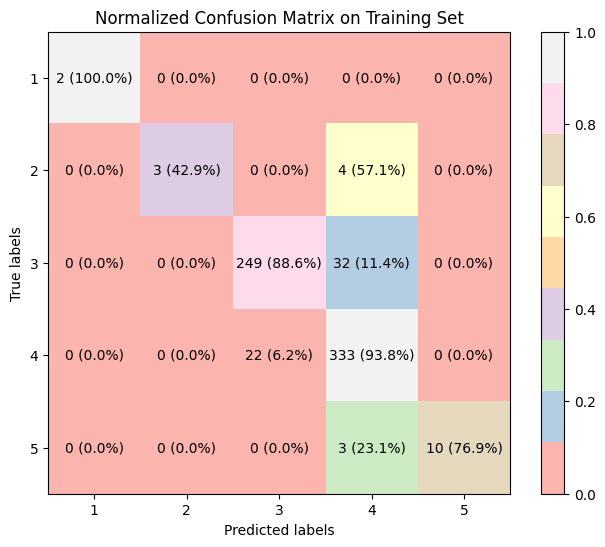

{'Accuracy': [0.9072948328267477], 'Precision': [0.9087696807696579], 'Recall': [0.9072948328267477], 'F1 Score': [0.9061222224060203]}


In [104]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_train3, y_pred_train3, zero_division=0))
print("Accuracy Report:")
print(accuracy_score(y_train3, y_pred_train3))
print("Confusion Matrix:")
conf_matrix3 = confusion_matrix(y_train3, y_pred_train3)

# Normalize the confusion matrix
conf_matrix_norm3 = conf_matrix3.astype('float') / conf_matrix3.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with values and percentages
plt.figure(figsize=(8, 6))

# Set tick labels to match the actual class labels (1 to 5)
plt.xticks(np.arange(5), np.arange(1, 6))  # Set x-axis ticks from 1 to 5
plt.yticks(np.arange(5), np.arange(1, 6))  # Set y-axis ticks from 1 to 5

for i in range(conf_matrix_norm3.shape[0]):
    for j in range(conf_matrix_norm3.shape[1]):
        plt.text(j, i, f"{conf_matrix3[i, j]} ({conf_matrix_norm3[i, j]*100:.1f}%)",
                 ha="center", va="center", color="black")
plt.imshow(conf_matrix_norm3, cmap='Pastel1', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Normalized Confusion Matrix on Training Set")
plt.show()

# Key assessment results table
accuracy3 = np.mean(y_pred_train3 == y_train3)
precision3 = np.mean(classification_report(y_train3, y_pred_train3, output_dict=True, zero_division=0)['weighted avg']['precision'])
recall3 = np.mean(classification_report(y_train3, y_pred_train3, output_dict=True, zero_division=0)['weighted avg']['recall'])
f1_3 = np.mean(classification_report(y_train3, y_pred_train3, output_dict=True, zero_division=0)['weighted avg']['f1-score'])

key_results3 = {
    'Accuracy': [accuracy3],
    'Precision': [precision3],
    'Recall': [recall3],
    'F1 Score': [f1_3]
}

print(key_results3)

## Evaluate the Model Performance on Testing Set

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.57      0.55      0.56        71
           4       0.64      0.67      0.66        89
           5       0.00      0.00      0.00         3

   micro avg       0.60      0.60      0.60       165
   macro avg       0.24      0.24      0.24       165
weighted avg       0.59      0.60      0.60       165



<ipython-input-112-e9aa59157bef>:25: RuntimeWarning: invalid value encountered in divide
  conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)


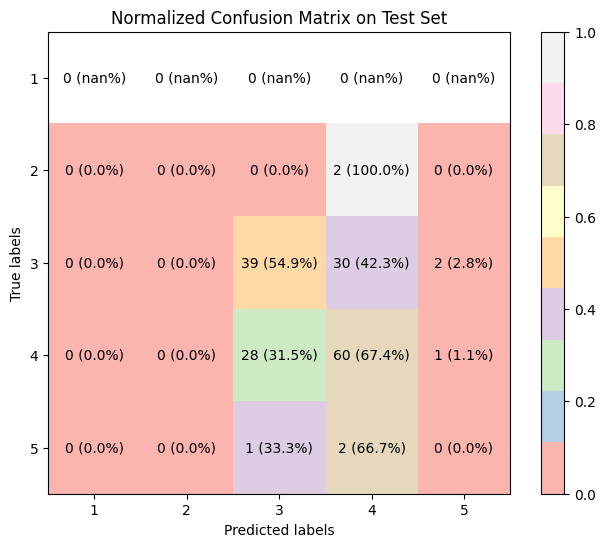

Key Assessment Results:
{'Accuracy': 0.6, 'Precision': 0.24236545682102628, 'Recall': 0.24469061560373478, 'F1 Score': 0.24337775681094467}


In [112]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined y_test3 and y_pred_test3

# Get unique classes from both true labels (y_test3) and predicted labels (y_pred_test3)
unique_classes = np.unique(np.concatenate((y_test3, y_pred_test3, [1])))

# Calculate precision, recall, F1-score, support, and accuracy for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test3, y_pred_test3, labels=unique_classes, zero_division=0)
accuracy = accuracy_score(y_test3, y_pred_test3)

# Construct classification report
classification_report_str = classification_report(y_test3, y_pred_test3, labels=unique_classes, zero_division=0)

# Print classification report
print("Classification Report:")
print(classification_report_str)

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test3, y_pred_test3, labels=unique_classes)

# Normalize confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

# Plot confusion matrix with values and percentages
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_norm, cmap='Pastel1', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(unique_classes)), unique_classes)
plt.yticks(np.arange(len(unique_classes)), unique_classes)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Normalized Confusion Matrix on Test Set")

# Display text within each cell of the confusion matrix
for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
        plt.text(j, i, f"{conf_matrix[i, j]} ({conf_matrix_norm[i, j]*100:.1f}%)",
                 ha="center", va="center", color="black")

plt.show()

# Print key assessment results
key_results = {
    'Accuracy': accuracy,
    'Precision': np.mean(precision),
    'Recall': np.mean(recall),
    'F1 Score': np.mean(f1_score)
}

print("Key Assessment Results:")
print(key_results)

## Check for Overfitting

In [113]:
# Calculate accuracies
accuracy_train3 = accuracy_score(y_train3, y_pred_train3)
accuracy_test3 = accuracy_score(y_test3, y_pred_test3)

# Print the accuracies
print("Accuracy on Training Data:", accuracy_train3)
print("Accuracy on Test Data:", accuracy_test3)

# Check for overfitting or underfitting
if accuracy_train3 > accuracy_test3:
    print("The model might be overfitting.")
elif accuracy_train3 < accuracy_test3:
    print("The model might be underfitting.")
else:
    print("The model's performance seems balanced.")

Accuracy on Training Data: 0.9072948328267477
Accuracy on Test Data: 0.6
The model might be overfitting.
